<a href="https://colab.research.google.com/github/smmurdock/Murach-Data-Science---Python/blob/main/ch02_examples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 2: The Pandas essentials for data analysis

In [1]:
import pandas as pd

## Get the data

**The components of a DataFrame**

Component | Description
:--- | :---
Column labels | The names at the top of the columns.
Column data | The data in the columns. All of the data in a column typically has the same data type with one entry in each row.
Column data types | Each column has a defined data type. If all of the elements in a column don't have the same data type, the elements are stored with the object data type.
Index | Also known as a row label. If an index isn't defined, it is generated as a sequence of integers starting with zero.
Metadata | Attributes of the DataFrame that are generated by Pandas when the DataFrame is constructed or changed.

**Three of the Pandas `read()` methods for importing data into a DataFrame**

Method | Data format
:--- | :---
`read_csv()` | CSV (comma-separated values)
`read_excel()` | Excel
`read_sql_query()` | SQL query

### Read a CSV file from a website into a DataFrame

In [2]:
url = 'https://www.murach.com/python_analysis/mortality.csv'
mortality_data = pd.read_csv(url)

In [3]:
mortality_data

,Year,Age Group,Death Rate
0,1900,1-4 Years,1983.8
1,1901,1-4 Years,1695.0
2,1902,1-4 Years,1655.7
3,1903,1-4 Years,1542.1
4,1904,1-4 Years,1591.5
...,...,...,...
471,2014,15-19 Years,45.5
472,2015,15-19 Years,48.3
473,2016,15-19 Years,51.2
474,2017,15-19 Years,51.5


### Use DataFrame constructor to build a DataFrame object

**The DataFrame() constructor**

Constructor | Description
--- | ---
`DataFrame(params)` | Create a DataFrame object


Parameter | Description
--- | ---
`data` | Can be an array, dictionary, or other object that's shaped like a table.
`columns` | Column labels. If they aren't specified, they will be generated.
`index` | Row labels. If they aren't specified, they will be generated.

In [4]:
df_data=[[1900, '1-4 Years', 1983.8],
         [1901, '1-4 Years', 1695.0]]
df_columns=['Year', 'Age Group', 'Death Rate']

In [5]:
mortality_df = pd.DataFrame(
    data=df_data,
    columns=df_columns)

In [6]:
mortality_df

,Year,Age Group,Death Rate
0,1900,1-4 Years,1983.8
1,1901,1-4 Years,1695.0


### Save and restore a DataFrame

**Three of the Pandas methods for saving a DataFrame to disk**

Method | Data Format
--- | ---
`to_pickle()` | Pickle
`to_csv()` | CSV (comma-separated values)
`to_excel()` | Excel

**The Pandas `read_pickled()` method**

Method | Data format
--- | ---
`read_pickle()` | Pickle

In [7]:
mortality_data.to_pickle('mortality_data.pkl')

In [8]:
mortality_data = pd.read_pickle('mortality_data.pkl')

In [9]:
mortality_data.head()

,Year,Age Group,Death Rate
0,1900,1-4 Years,1983.8
1,1901,1-4 Years,1695.0
2,1902,1-4 Years,1655.7
3,1903,1-4 Years,1542.1
4,1904,1-4 Years,1591.5


In [10]:
mortality_data.to_csv('mortality.csv', index=False)

## Examine and clean the data

### Display the data

**Two methods for displaying the data in a DataFrame**
Method | Description
--- | ---
`head(rows)` | Displays the first 5 rows or the number of rows in the parameter.
`tail(rows)` | Displays the last 5 rows or the number of rows in the parameter.

In [11]:
mortality_data

,Year,Age Group,Death Rate
0,1900,1-4 Years,1983.8
1,1901,1-4 Years,1695.0
2,1902,1-4 Years,1655.7
3,1903,1-4 Years,1542.1
4,1904,1-4 Years,1591.5
...,...,...,...
471,2014,15-19 Years,45.5
472,2015,15-19 Years,48.3
473,2016,15-19 Years,51.2
474,2017,15-19 Years,51.5


In [12]:
mortality_data.head()

,Year,Age Group,Death Rate
0,1900,1-4 Years,1983.8
1,1901,1-4 Years,1695.0
2,1902,1-4 Years,1655.7
3,1903,1-4 Years,1542.1
4,1904,1-4 Years,1591.5


In [13]:
mortality_data.tail(3)

,Year,Age Group,Death Rate
473,2016,15-19 Years,51.2
474,2017,15-19 Years,51.5
475,2018,15-19 Years,49.2


In [14]:
with pd.option_context(
    'display.max_rows', 5,
    'display.max_columns', None):
    display(mortality_data)

,Year,Age Group,Death Rate
0,1900,1-4 Years,1983.8
1,1901,1-4 Years,1695.0
...,...,...,...
474,2017,15-19 Years,51.5
475,2018,15-19 Years,49.2


### Display the DataFrame attributes

Attribute | Description
:-- | :--
values | The values of the DataFrame in an array format
index | The row index
columns | The column names
size | The total number of elements
shape | The number of rows and columns

In [15]:
mortality_data.values

array([[1900, '1-4 Years', 1983.8],
       [1901, '1-4 Years', 1695.0],
       [1902, '1-4 Years', 1655.7],
       ...,
       [2016, '15-19 Years', 51.2],
       [2017, '15-19 Years', 51.5],
       [2018, '15-19 Years', 49.2]], dtype=object)

In [16]:
print("Index:  ", mortality_data.index)
print("Columns:", mortality_data.columns)
print("Size:   ", mortality_data.size)
print("Shape:  ", mortality_data.shape)

Index:   RangeIndex(start=0, stop=476, step=1)
Columns: Index(['Year', 'Age Group', 'Death Rate'], dtype='object')
Size:    1428
Shape:   (476, 3)


### Use the columns attribute to replace spaces with nothing

In [17]:
mortality_data.columns = mortality_data.columns.str.replace(' ', '')

In [18]:
mortality_data.columns

Index(['Year', 'AgeGroup', 'DeathRate'], dtype='object')

In [19]:
mortality_data.head()

,Year,AgeGroup,DeathRate
0,1900,1-4 Years,1983.8
1,1901,1-4 Years,1695.0
2,1902,1-4 Years,1655.7
3,1903,1-4 Years,1542.1
4,1904,1-4 Years,1591.5


### Use the info(), nunique(), and describe() methods

Method | Description
:-- | :--
info(params) | Returns information about the DataFrame and its columns.
nunique() | Returns the number of unique data items in each column.
describe() | Returns statistical information for each numeric column.

In [20]:
mortality_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476 entries, 0 to 475
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Year       476 non-null    int64  
 1   AgeGroup   476 non-null    object 
 2   DeathRate  476 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 11.3+ KB


In [21]:
mortality_data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476 entries, 0 to 475
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Year       476 non-null    int64  
 1   AgeGroup   476 non-null    object 
 2   DeathRate  476 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 38.7 KB


In [22]:
mortality_data.nunique()

,0
Year,119
AgeGroup,4
DeathRate,430


In [23]:
mortality_data.describe()

,Year,DeathRate
count,476.000000,476.000000
mean,1959.000000,192.924160
std,34.387268,293.224216
min,1900.000000,11.400000
25%,1929.000000,40.575000
50%,1959.000000,89.500000
75%,1989.000000,222.575000
max,2018.000000,1983.800000


In [24]:
mortality_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,476.0,1959.00000,34.387268,1900.0,1929.000,1959.0,1989.000,2018.0
DeathRate,476.0,192.92416,293.224216,11.4,40.575,89.5,222.575,1983.8


## Access the data

### Access columns

**The syntax for accessing columns**

To access | With brackets | With dot notation
--- | --- | ---
One column | `df[column_name]` | `df.column_name`
 | `df[[column_name]]` |
Two or more columns | `df[[col1, col2, ...]]` |

In [25]:
# With dot notation
mortality_data.DeathRate.head(2)

,DeathRate
0,1983.8
1,1695.0


In [26]:
type(mortality_data.DeathRate)

pandas.core.series.Series

In [27]:
# With brackets
mortality_data['DeathRate'].head(2)

,DeathRate
0,1983.8
1,1695.0


In [28]:
# Use a list to access two or more columns
mortality_data[['Year','DeathRate']].head(2)

,Year,DeathRate
0,1900,1983.8
1,1901,1695.0


In [29]:
type(mortality_data[['Year','DeathRate']])

pandas.core.frame.DataFrame

### Access rows

**The `query()` method**

Method | Description
:-- | :--
`query(condition)` | Gets the data specified by the condition.

In [30]:
# Based on a single column
mortality_data.query('Year==1900')

,Year,AgeGroup,DeathRate
0,1900,1-4 Years,1983.8
119,1900,5-9 Years,466.1
238,1900,10-14 Years,298.3
357,1900,15-19 Years,484.8


In [31]:
# Based on multiple columns with the _and_ operator
mortality_data.query('Year == 2000 and AgeGroup != "1-4 Years"')

,Year,AgeGroup,DeathRate
219,2000,5-9 Years,15.8
338,2000,10-14 Years,20.3
457,2000,15-19 Years,67.1


In [32]:
# Based on multiple columns with the _or_ operator
mortality_data.query('Year == 1900 or Year == 2000').head()

,Year,AgeGroup,DeathRate
0,1900,1-4 Years,1983.8
100,2000,1-4 Years,32.4
119,1900,5-9 Years,466.1
219,2000,5-9 Years,15.8
238,1900,10-14 Years,298.3


In [33]:
# Use backticks for column names that contain spaces
mortality_data.query('Year == 2000 and `AgeGroup` != "1-4 Years"')

,Year,AgeGroup,DeathRate
219,2000,5-9 Years,15.8
338,2000,10-14 Years,20.3
457,2000,15-19 Years,67.1


### Access a subset of rows and columns

In [34]:
# How to access one column from a subset of rows using dot notation
mortality_data.query('Year == 1900').DeathRate.head()

,DeathRate
0,1983.8
119,466.1
238,298.3
357,484.8


In [35]:
# How to access one column from a subset of rows using brackets
mortality_data.query('Year == 1900')['DeathRate'].head()

,DeathRate
0,1983.8
119,466.1
238,298.3
357,484.8


In [36]:
# How to access one column from a subset of rows using a list
mortality_data.query('Year == 1900')[['DeathRate']].head()

,DeathRate
0,1983.8
119,466.1
238,298.3
357,484.8


In [37]:
# How to access two or more columns from a subset of rows using a list
mortality_data.query('Year == 1900')[['AgeGroup','DeathRate']].head()

,AgeGroup,DeathRate
0,1-4 Years,1983.8
119,5-9 Years,466.1
238,10-14 Years,298.3
357,15-19 Years,484.8


### Access rows with the loc[] accessor

**The `loc[]` and `iloc[]` accessors for accessing rows and columns**

Accessor | Description
:-- | :--
`loc[rows, columns]` | Accesses rows and columns by their labels.
`iloc[rows, columns]` | Accesses rows and columns by their positions.

In [38]:
# With a list to access the rows with labels 0, 5, and 10
mortality_data.loc[[0,5,10]]

,Year,AgeGroup,DeathRate
0,1900,1-4 Years,1983.8
5,1905,1-4 Years,1498.9
10,1910,1-4 Years,1397.3


In [39]:
# With a slice to access the rows with labels 4 through 6
mortality_data.loc[4:6]

,Year,AgeGroup,DeathRate
4,1904,1-4 Years,1591.5
5,1905,1-4 Years,1498.9
6,1906,1-4 Years,1580.0


In [40]:
# With a slice to access every 5th row from 0 through 20
mortality_data.loc[0:20:5]

,Year,AgeGroup,DeathRate
0,1900,1-4 Years,1983.8
5,1905,1-4 Years,1498.9
10,1910,1-4 Years,1397.3
15,1915,1-4 Years,924.2
20,1920,1-4 Years,987.2


In [41]:
# With a conditional expression to access the rows for the year 1917
mortality_data.loc[mortality_data.Year == 1917]

,Year,AgeGroup,DeathRate
17,1917,1-4 Years,1066.0
136,1917,5-9 Years,290.7
255,1917,10-14 Years,218.9
374,1917,15-19 Years,380.3


### Access columns with the loc[] accessor

In [42]:
mortality_data.loc[:, ['Year', 'AgeGroup']]

,Year,AgeGroup
0,1900,1-4 Years
1,1901,1-4 Years
2,1902,1-4 Years
3,1903,1-4 Years
4,1904,1-4 Years
...,...,...
471,2014,15-19 Years
472,2015,15-19 Years
473,2016,15-19 Years
474,2017,15-19 Years


### Access rows and columns with the loc[] accessor

In [43]:
# With lists of rows and column labels
mortality_data.loc[[0,5,10],['AgeGroup','DeathRate']]

,AgeGroup,DeathRate
0,1-4 Years,1983.8
5,1-4 Years,1498.9
10,1-4 Years,1397.3


In [44]:
# With slices of row and column labels
mortality_data.loc[4:6,'AgeGroup':'DeathRate']

,AgeGroup,DeathRate
4,1-4 Years,1591.5
5,1-4 Years,1498.9
6,1-4 Years,1580.0


### How to access rows and columns with the iloc[] accessor

In [45]:
# With list of rows and column positions
mortality_data.iloc[[4,5,6],[1,2]]

,AgeGroup,DeathRate
4,1-4 Years,1591.5
5,1-4 Years,1498.9
6,1-4 Years,1580.0


In [46]:
# With slices of rows and column positions
mortality_data.iloc[4:7,1:3]

,AgeGroup,DeathRate
4,1-4 Years,1591.5
5,1-4 Years,1498.9
6,1-4 Years,1580.0


In [47]:
# With a negative row position in a slice to access the last 10 rows
mortality_data.iloc[-10:]

,Year,AgeGroup,DeathRate
466,2009,15-19 Years,51.9
467,2010,15-19 Years,49.4
468,2011,15-19 Years,48.9
469,2012,15-19 Years,47.2
470,2013,15-19 Years,44.8
471,2014,15-19 Years,45.5
472,2015,15-19 Years,48.3
473,2016,15-19 Years,51.2
474,2017,15-19 Years,51.5
475,2018,15-19 Years,49.2


## Prepare the data

### Sort the data

**The `sort_values()` method**

Method | Description
:-- | :--
`sort_values(columns, ascending)` | Sorts the DataFrame rows in ascending order (the default) or descending order based on the data in the specified columns.

In [48]:
# How to sort by one column in descending order
mortality_data.sort_values('DeathRate', ascending=False).head(3)

,Year,AgeGroup,DeathRate
0,1900,1-4 Years,1983.8
1,1901,1-4 Years,1695.0
2,1902,1-4 Years,1655.7


In [49]:
# How to sort by multiple columns in ascending order
mortality_data.sort_values(['Year','DeathRate']).head(3)

,Year,AgeGroup,DeathRate
238,1900,10-14 Years,298.3
119,1900,5-9 Years,466.1
357,1900,15-19 Years,484.8


In [50]:
# How to sort by multiple columns in mixed orders
mortality_data.sort_values(['Year','DeathRate'],
                           ascending=[True,False]).head()

,Year,AgeGroup,DeathRate
0,1900,1-4 Years,1983.8
357,1900,15-19 Years,484.8
119,1900,5-9 Years,466.1
238,1900,10-14 Years,298.3
1,1901,1-4 Years,1695.0


### Apply statistical methods

**Some of the Pandas methods for both Series and DataFrame objects**

Method | Returns
:-- | :--
`count()` | Number of values not including null values
`mean()` | Mean (average)
`median()` | Median
`min()` | Minimum value
`max()` | Maximum value
`std()` | Standard deviation
`sum()` | Sum of the values
`cumsum()` | Cumulative sum of the values
`quantile(q)` | Quantile value specified as a decimal fraction like .25

In [51]:
# How to apply a method to one column
mortality_data.DeathRate.mean()

192.92415966386554

In [52]:
# How to apply a method to two columns
mortality_data[['AgeGroup','DeathRate']].max()

,0
AgeGroup,5-9 Years
DeathRate,1983.8


In [53]:
# How to apply a method to all columns
mortality_data.count()

,0
Year,476
AgeGroup,476
DeathRate,476


In [54]:
# How to apply the `quantile()` method to two different quantiles
mortality_data[['Year','DeathRate']].quantile([.1,.9])

,Year,DeathRate
0.1,1911.5,21.50
0.9,2006.5,430.85


In [55]:
# How to apply the `cumsum()` method to one column
mortality_data.DeathRate.cumsum()

,DeathRate
0,1983.8
1,3678.8
2,5334.5
3,6876.6
4,8468.1
...,...
471,91631.7
472,91680.0
473,91731.2
474,91782.7


In [56]:
# How to apply a method to one column
mortality_data.AgeGroup.max()

'5-9 Years'

### Use Python for column arithmetic

**The Python operators for column arithmetic**

Operator | Name | Description
:-- | :-- | :--
`+` | Addition | Adds two operands.
`-` | Subtraction | Subtracts the right operand from the left.
`*` | Multiplication | Multiplies two operands.
`/` | Division | Divides the right operand into the left and returns a floating-point number.
`//` | Integer division | Divides the right operand into the left and drops the decimal portion of the result.
`%` | Modulo/Remainder | Divides the right operand into the left and returns the remainder as an integer.
`**` | Exponentiation | Raises the left operand to the power of the right operand.

In [57]:
# How to add a column to a DataFrame
mortality_data['MeanCentered'] = \
    mortality_data.DeathRate - mortality_data.DeathRate.mean()

In [58]:
mortality_data.head(4)

,Year,AgeGroup,DeathRate,MeanCentered
0,1900,1-4 Years,1983.8,1790.87584
1,1901,1-4 Years,1695.0,1502.07584
2,1902,1-4 Years,1655.7,1462.77584
3,1903,1-4 Years,1542.1,1349.17584


In [59]:
# How to modify the data in an existing column
mortality_data['DeathRate'] = mortality_data.DeathRate / 100000

In [60]:
mortality_data.head(4)

,Year,AgeGroup,DeathRate,MeanCentered
0,1900,1-4 Years,0.019838,1790.87584
1,1901,1-4 Years,0.016950,1502.07584
2,1902,1-4 Years,0.016557,1462.77584
3,1903,1-4 Years,0.015421,1349.17584


### Modify the string data in a column

**The Pandas `replace()` method**

Method | Description
:-- | :--
`replace(to_replace, value, inplace)` | Replaces the string in the `to_replace` parameter with the strings in the value parameter or replaces the old values in a dictionary with the new values.

**The Python `replace()` method**

Method | Description
:-- | :--
`replace(old, new)` | Replaces the string in the old parameter with the string in the new parameter.

In [61]:
# With the Pandas `replace()` method with three parameters
mortality_data.AgeGroup = mortality_data.AgeGroup.replace(
    to_replace = ['1-4 Years','5-9 Years'],
    value = ['01-04 Years','05-09 Years'])

In [62]:
# With the Pandas `replace()` method and a dictionary of old and new values
mortality_data.AgeGroup = mortality_data.AgeGroup.replace(
    {'1-4 Years':'01-04 Years','5-9 Years':'05-09 Years'})

In [63]:
# With the Python `replace()` method
mortality_data['AgeGroup'] = \
    mortality_data.AgeGroup.str.replace('1-4 Years', '01-04 Years')
mortality_data['AgeGroup'] = \
    mortality_data.AgeGroup.str.replace('5-9 Years', '05-09 Years')

In [64]:
mortality_data.head(4)

,Year,AgeGroup,DeathRate,MeanCentered
0,1900,01-04 Years,0.019838,1790.87584
1,1901,01-04 Years,0.016950,1502.07584
2,1902,01-04 Years,0.016557,1462.77584
3,1903,01-04 Years,0.015421,1349.17584


## Shape the data

### Set and use an index

In [65]:
mortality_data = mortality_data.set_index('Year')
mortality_data.head(2)

,AgeGroup,DeathRate,MeanCentered
Year,,,
1900,01-04 Years,0.019838,1790.87584
1901,01-04 Years,0.016950,1502.07584


In [66]:
mortality_data = mortality_data.reset_index()

In [67]:
# NOTE: the following line of code causes ValueError: Index has duplicate keys
# mortality_data = mortality_data.set_index('Year', verify_integrity=True)

In [68]:
mortality_data = mortality_data.set_index(
    ['Year','AgeGroup'], verify_integrity=True)
mortality_data.head(2)

,,DeathRate,MeanCentered
Year,AgeGroup,,
1900,01-04 Years,0.019838,1790.87584
1901,01-04 Years,0.016950,1502.07584


In [69]:
mortality_data = mortality_data.reset_index()
mortality_data.head(2)

,Year,AgeGroup,DeathRate,MeanCentered
0,1900,01-04 Years,0.019838,1790.87584
1,1901,01-04 Years,0.016950,1502.07584


### Pivot the data

In [70]:
mortality_wide = mortality_data.pivot(
    index='Year', columns='AgeGroup', values='DeathRate')
mortality_wide.head(3)

AgeGroup,01-04 Years,05-09 Years,10-14 Years,15-19 Years
Year,,,,
1900,0.019838,0.004661,0.002983,0.004848
1901,0.016950,0.004276,0.002736,0.004544
1902,0.016557,0.004033,0.002525,0.004215


In [71]:
mortality_wide = mortality_data.pivot(
    index='Year', columns='AgeGroup')
mortality_wide.head(3)

DeathRate                                     MeanCentered  \
AgeGroup 01-04 Years 05-09 Years 10-14 Years 15-19 Years  01-04 Years   
Year                                                                    
1900        0.019838    0.004661    0.002983    0.004848   1790.87584   
1901        0.016950    0.004276    0.002736    0.004544   1502.07584   
1902        0.016557    0.004033    0.002525    0.004215   1462.77584   

                                              
AgeGroup 05-09 Years 10-14 Years 15-19 Years  
Year                                          
1900       273.17584   105.37584   291.87584  
1901       234.67584    80.67584   261.47584  
1902       210.37584    59.57584   228.57584

### Melt the data

In [72]:
# get starting data
mortality_wide = mortality_data.pivot(
    index='Year', columns='AgeGroup', values='DeathRate')

# save to Excel format to remove indexes
mortality_wide.to_excel('mortality_wide.xlsx')
mortality_wide = pd.read_excel('mortality_wide.xlsx')

mortality_wide.head(4)

,Year,01-04 Years,05-09 Years,10-14 Years,15-19 Years
0,1900,0.019838,0.004661,0.002983,0.004848
1,1901,0.016950,0.004276,0.002736,0.004544
2,1902,0.016557,0.004033,0.002525,0.004215
3,1903,0.015421,0.004147,0.002682,0.004341


In [73]:
mortality_wide = pd.read_excel('mortality_wide.xlsx')

In [74]:
mortality_long = mortality_wide.melt(
    id_vars = 'Year',
    value_vars=['01-04 Years','05-09 Years'],
    var_name ='AgeGroup',
    value_name='DeathRate')

with pd.option_context('display.max_rows', 4):
    display(mortality_long)

,Year,AgeGroup,DeathRate
0,1900,01-04 Years,0.019838
1,1901,01-04 Years,0.016950
...,...,...,...
236,2017,05-09 Years,0.000116
237,2018,05-09 Years,0.000115


## Analyze the data

### Group the data

In [75]:
mortality_data.groupby('AgeGroup').mean()

,Year,DeathRate,MeanCentered
AgeGroup,,,
01-04 Years,1959.0,0.003832,190.301891
05-09 Years,1959.0,0.001173,-75.598109
10-14 Years,1959.0,0.000938,-99.154412
15-19 Years,1959.0,0.001774,-15.549370


In [76]:
mortality_data.groupby('Year')[['DeathRate', 'MeanCentered']].median().head(4)

,DeathRate,MeanCentered
Year,,
1900,0.004755,282.52584
1901,0.004410,248.07584
1902,0.004124,219.47584
1903,0.004244,231.47584


In [77]:
mortality_data.groupby(['Year','AgeGroup']).count().head()

DeathRate  MeanCentered
Year AgeGroup                            
1900 01-04 Years          1             1
     05-09 Years          1             1
     10-14 Years          1             1
     15-19 Years          1             1
1901 01-04 Years          1             1

### Aggregate the data

In [78]:
mortality_data.groupby('AgeGroup').agg(['mean','median'])

Year         DeathRate           MeanCentered           
               mean  median      mean    median         mean     median
AgeGroup                                                               
01-04 Years  1959.0  1959.0  0.003832  0.001091   190.301891  -83.82416
05-09 Years  1959.0  1959.0  0.001173  0.000484   -75.598109 -144.52416
10-14 Years  1959.0  1959.0  0.000938  0.000446   -99.154412 -148.32416
15-19 Years  1959.0  1959.0  0.001774  0.001069   -15.549370  -86.02416

In [79]:
mortality_data.groupby('AgeGroup')['DeathRate'] \
    .agg(['mean','median','std','nunique'])

,mean,median,std,nunique
AgeGroup,,,,
01-04 Years,0.003832,0.001091,0.005005,117
05-09 Years,0.001173,0.000484,0.001275,115
10-14 Years,0.000938,0.000446,0.000884,115
15-19 Years,0.001774,0.001069,0.001384,117


In [80]:
mortality_data.groupby('Year')['DeathRate'] \
    .agg(['mean','median','std','min','max','var','nunique']).head(3)

,mean,median,std,min,max,var,nunique
Year,,,,,,,
1900,0.008082,0.004755,0.007882,0.002983,0.019838,0.000062,4
1901,0.007127,0.004410,0.006597,0.002736,0.016950,0.000044,4
1902,0.006833,0.004124,0.006527,0.002525,0.016557,0.000043,4


## Visualize the data

<Axes: xlabel='Year'>

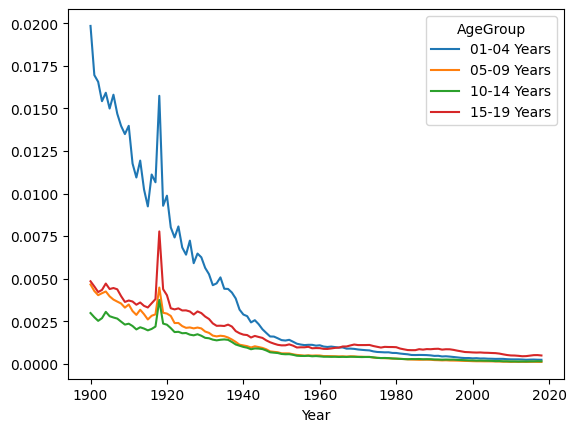

In [81]:
mortality_data.pivot(index='Year',columns='AgeGroup')['DeathRate'].plot()

<Axes: ylabel='AgeGroup'>

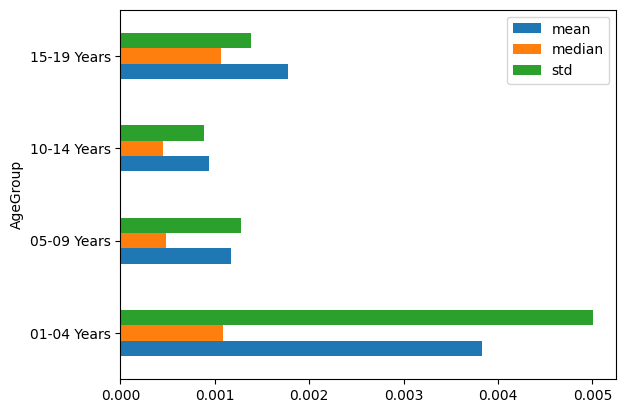

In [82]:
mortality_data.groupby('AgeGroup')['DeathRate'] \
    .agg(['mean','median','std']).plot.barh()

In [83]:
mortality_data.Year = mortality_data.AgeGroup